# mlp模型迁移数据预测

In [52]:
# 依赖导入
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
import joblib

In [9]:
# 导入数据
data1 = pd.read_csv("./task1_data1.csv")
data2 = pd.read_csv("./task1_data2.csv")
data1_x = data1.loc[:, "x"]
data1_y = data1.loc[:, "y"]
data2_x = data2.loc[:, "x"]
data2_y = data2.loc[:, "y"]

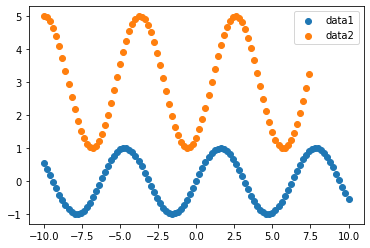

In [12]:
# 数据可视化
fig1 = plt.figure()
plt.scatter(data1_x, data1_y, label="data1")
plt.scatter(data2_x, data2_y, label="data2")
plt.legend()
plt.show()

In [14]:
# 维度确认
print(data1_x.shape, data1_y.shape)

(101,) (101,)


In [16]:
data1_x = np.array(data1_x).reshape(-1, 1)
data2_x = np.array(data2_x).reshape(-1, 1)

In [17]:
print(data1_x.shape, data2_x.shape)

(101, 1) (88, 1)


In [18]:
# 建立mlp模型
model1 = Sequential()
model1.add(Dense(units=50, input_dim=1, activation="relu"))
model1.add(Dense(units=50, activation="relu"))
model1.add(Dense(units=1, activation="linear"))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________


In [19]:
model1.compile(optimizer="adam", loss="mean_squared_error")

In [21]:
model1.fit(data1_x, data1_y, epochs=500)

Epoch 1/500
4/4 [==============================] - 0s 1ms/step - loss: 0.4828
Epoch 2/500
4/4 [==============================] - 0s 1ms/step - loss: 0.4938
Epoch 3/500
4/4 [==============================] - 0s 1ms/step - loss: 0.4905
Epoch 4/500
4/4 [==============================] - 0s 1ms/step - loss: 0.4732
Epoch 5/500
4/4 [==============================] - 0s 1ms/step - loss: 0.4656
Epoch 6/500
4/4 [==============================] - 0s 1ms/step - loss: 0.4639
Epoch 7/500
4/4 [==============================] - 0s 1ms/step - loss: 0.4589
Epoch 8/500
4/4 [==============================] - 0s 1ms/step - loss: 0.4584
Epoch 9/500
4/4 [==============================] - 0s 1ms/step - loss: 0.4646
Epoch 10/500
4/4 [==============================] - 0s 1ms/step - loss: 0.4650
Epoch 11/500
4/4 [==============================] - 0s 1ms/step - loss: 0.4588
Epoch 12/500
4/4 [==============================] - 0s 2ms/step - loss: 0.4551
Epoch 13/500
4/4 [==============================] - 0s 2ms/st

4/4 [==============================] - 0s 967us/step - loss: 0.3988
Epoch 105/500
4/4 [==============================] - 0s 1ms/step - loss: 0.3881
Epoch 106/500
4/4 [==============================] - 0s 1ms/step - loss: 0.3931
Epoch 107/500
4/4 [==============================] - 0s 1ms/step - loss: 0.3927
Epoch 108/500
4/4 [==============================] - 0s 1ms/step - loss: 0.3887
Epoch 109/500
4/4 [==============================] - 0s 1ms/step - loss: 0.3847
Epoch 110/500
4/4 [==============================] - 0s 1ms/step - loss: 0.3844
Epoch 111/500
4/4 [==============================] - 0s 979us/step - loss: 0.3747
Epoch 112/500
4/4 [==============================] - 0s 1ms/step - loss: 0.3875
Epoch 113/500
4/4 [==============================] - 0s 1ms/step - loss: 0.3907
Epoch 114/500
4/4 [==============================] - 0s 1ms/step - loss: 0.3934
Epoch 115/500
4/4 [==============================] - 0s 1ms/step - loss: 0.3868
Epoch 116/500
4/4 [==============================]

4/4 [==============================] - 0s 1ms/step - loss: 0.2620
Epoch 207/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2499
Epoch 208/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2489
Epoch 209/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2463
Epoch 210/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2553
Epoch 211/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2516
Epoch 212/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2478
Epoch 213/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2566
Epoch 214/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2622
Epoch 215/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2655
Epoch 216/500
4/4 [==============================] - 0s 979us/step - loss: 0.2559
Epoch 217/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2445
Epoch 218/500
4/4 [==============================] -

4/4 [==============================] - 0s 1ms/step - loss: 0.2025
Epoch 309/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2031
Epoch 310/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2039
Epoch 311/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2064
Epoch 312/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2232
Epoch 313/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2066
Epoch 314/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2176
Epoch 315/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2327
Epoch 316/500
4/4 [==============================] - 0s 965us/step - loss: 0.2022
Epoch 317/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2143
Epoch 318/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2030
Epoch 319/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2074
Epoch 320/500
4/4 [==============================] -

4/4 [==============================] - 0s 1ms/step - loss: 0.2049
Epoch 411/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1887
Epoch 412/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2031
Epoch 413/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2200
Epoch 414/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2130
Epoch 415/500
4/4 [==============================] - 0s 2ms/step - loss: 0.1961
Epoch 416/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1930
Epoch 417/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1949
Epoch 418/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1973
Epoch 419/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2072
Epoch 420/500
4/4 [==============================] - 0s 999us/step - loss: 0.1985
Epoch 421/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1907
Epoch 422/500
4/4 [==============================] -

In [22]:
# 模型预测与表现评估
data1_y_predict = model1.predict(data1_x)

In [26]:
# r2分数评估
data1_score = r2_score(data1_y, data1_y_predict)
data1_score

0.5924812380813432

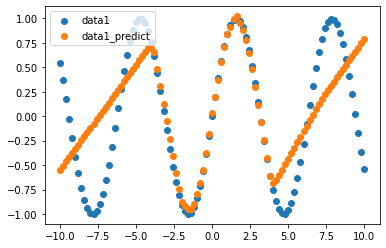

In [27]:
# 数据可视化
fig1 = plt.figure()
plt.scatter(data1_x, data1_y, label="data1")
plt.scatter(data1_x, data1_y_predict, label="data1_predict")
plt.legend()
plt.show()

In [28]:
# 模型训练500+500 = 1000次
model1.fit(data1_x, data1_y, epochs=500)

Epoch 1/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1936
Epoch 2/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1927
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 0.1920
Epoch 4/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1938
Epoch 5/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1977
Epoch 6/500
4/4 [==============================] - 0s 2ms/step - loss: 0.1953
Epoch 7/500
4/4 [==============================] - 0s 2ms/step - loss: 0.1943
Epoch 8/500
4/4 [==============================] - 0s 2ms/step - loss: 0.1907
Epoch 9/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1970
Epoch 10/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1955
Epoch 11/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1942
Epoch 12/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1948
Epoch 13/500
4/4 [==============================] - 0s 1ms/st

4/4 [==============================] - 0s 1ms/step - loss: 0.1898
Epoch 105/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1973
Epoch 106/500
4/4 [==============================] - 0s 2ms/step - loss: 0.1925
Epoch 107/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1920
Epoch 108/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1936
Epoch 109/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1896
Epoch 110/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1948
Epoch 111/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1945
Epoch 112/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1915
Epoch 113/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1848
Epoch 114/500
4/4 [==============================] - 0s 2ms/step - loss: 0.1862
Epoch 115/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2073
Epoch 116/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step - loss: 0.1807
Epoch 207/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1781
Epoch 208/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1768
Epoch 209/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1780
Epoch 210/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1840
Epoch 211/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1843
Epoch 212/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1794
Epoch 213/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1831
Epoch 214/500
4/4 [==============================] - 0s 2ms/step - loss: 0.1762
Epoch 215/500
4/4 [==============================] - 0s 946us/step - loss: 0.1780
Epoch 216/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1752
Epoch 217/500
4/4 [==============================] - 0s 2ms/step - loss: 0.1774
Epoch 218/500
4/4 [==============================] -

4/4 [==============================] - 0s 1ms/step - loss: 0.1596
Epoch 309/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1550
Epoch 310/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1642
Epoch 311/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1855
Epoch 312/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1745
Epoch 313/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1592
Epoch 314/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1578
Epoch 315/500
4/4 [==============================] - 0s 979us/step - loss: 0.1583
Epoch 316/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1575
Epoch 317/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1587
Epoch 318/500
4/4 [==============================] - 0s 934us/step - loss: 0.1573
Epoch 319/500
4/4 [==============================] - 0s 999us/step - loss: 0.1596
Epoch 320/500
4/4 [=============================

4/4 [==============================] - 0s 1ms/step - loss: 0.1426
Epoch 411/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1381
Epoch 412/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1353
Epoch 413/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1368
Epoch 414/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1349
Epoch 415/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1346
Epoch 416/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1351
Epoch 417/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1327
Epoch 418/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1364
Epoch 419/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1372
Epoch 420/500
4/4 [==============================] - 0s 962us/step - loss: 0.1341
Epoch 421/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1316
Epoch 422/500
4/4 [==============================] -

In [29]:
# 模型预测与表现评估
data1_y_predict = model1.predict(data1_x)
# r2分数评估
data1_score = r2_score(data1_y, data1_y_predict)
data1_score

0.7429963874550349

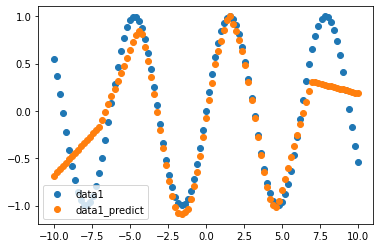

In [30]:
# 数据可视化
fig1 = plt.figure()
plt.scatter(data1_x, data1_y, label="data1")
plt.scatter(data1_x, data1_y_predict, label="data1_predict")
plt.legend()
plt.show()

In [31]:
# 模型训练500+500+500 = 1500次
model1.fit(data1_x, data1_y, epochs=500)

Epoch 1/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1228
Epoch 2/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1174
Epoch 3/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1239
Epoch 4/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1265
Epoch 5/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1209
Epoch 6/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1284
Epoch 7/500
4/4 [==============================] - 0s 2ms/step - loss: 0.1322
Epoch 8/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1242
Epoch 9/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1217
Epoch 10/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1163
Epoch 11/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1190
Epoch 12/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1183
Epoch 13/500
4/4 [==============================] - 0s 2ms/st

4/4 [==============================] - 0s 1ms/step - loss: 0.0956
Epoch 105/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0931
Epoch 106/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0927
Epoch 107/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0901
Epoch 108/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0901
Epoch 109/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0884
Epoch 110/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0908
Epoch 111/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0907
Epoch 112/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0923
Epoch 113/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0959
Epoch 114/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0992
Epoch 115/500
4/4 [==============================] - 0s 953us/step - loss: 0.1059
Epoch 116/500
4/4 [==============================] -

4/4 [==============================] - 0s 1ms/step - loss: 0.0676
Epoch 207/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0674
Epoch 208/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0635
Epoch 209/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0637
Epoch 210/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0650
Epoch 211/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0631
Epoch 212/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0632
Epoch 213/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0666
Epoch 214/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0726
Epoch 215/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0703
Epoch 216/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0659
Epoch 217/500
4/4 [==============================] - 0s 943us/step - loss: 0.0627
Epoch 218/500
4/4 [==============================] -

4/4 [==============================] - 0s 1ms/step - loss: 0.0474
Epoch 309/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0413
Epoch 310/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0415
Epoch 311/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0403
Epoch 312/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0410
Epoch 313/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0425
Epoch 314/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0380
Epoch 315/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0408
Epoch 316/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0384
Epoch 317/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0399
Epoch 318/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0391
Epoch 319/500
4/4 [==============================] - 0s 986us/step - loss: 0.0375
Epoch 320/500
4/4 [==============================] -

4/4 [==============================] - 0s 1ms/step - loss: 0.0209
Epoch 411/500
4/4 [==============================] - 0s 974us/step - loss: 0.0208
Epoch 412/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0216
Epoch 413/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0215
Epoch 414/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0235
Epoch 415/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0241
Epoch 416/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0226
Epoch 417/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0199
Epoch 418/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0226
Epoch 419/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 420/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0196
Epoch 421/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0200
Epoch 422/500
4/4 [==============================] -

In [32]:
# 模型预测与表现评估
data1_y_predict = model1.predict(data1_x)
# r2分数评估
data1_score = r2_score(data1_y, data1_y_predict)
data1_score

0.9752192318256078

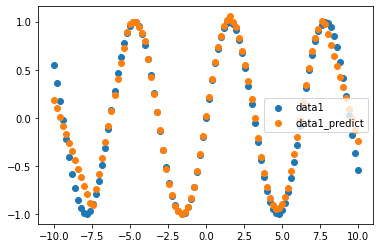

In [33]:
# 数据可视化
fig1 = plt.figure()
plt.scatter(data1_x, data1_y, label="data1")
plt.scatter(data1_x, data1_y_predict, label="data1_predict")
plt.legend()
plt.show()

In [34]:
# 模型训练500+500+500+1000= 2500次
model1.fit(data1_x, data1_y, epochs=1000)

Epoch 1/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 2/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0116
Epoch 3/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0155
Epoch 4/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0175
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 6/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0145
Epoch 7/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0114
Epoch 8/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0134
Epoch 9/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0176
Epoch 10/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0183
Epoch 11/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 12/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0112
Epoch 13/1000
4/4 [==============================

4/4 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 104/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 105/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 106/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 107/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 108/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0079
Epoch 109/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0066
Epoch 110/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0058
Epoch 111/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 112/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 113/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0058
Epoch 114/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 115/1000
4/4 [=======================

4/4 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 205/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 206/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 207/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0033
Epoch 208/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 209/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 210/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 211/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 212/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 213/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 214/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 215/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 216/1000
4/4 [=======================

4/4 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 306/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 307/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 308/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 309/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 310/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 311/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 312/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 313/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 314/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 315/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 316/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 317/1000
4/4 [=======================

4/4 [==============================] - 0s 995us/step - loss: 0.0025
Epoch 407/1000
4/4 [==============================] - 0s 996us/step - loss: 0.0015
Epoch 408/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 409/1000
4/4 [==============================] - 0s 971us/step - loss: 0.0021
Epoch 410/1000
4/4 [==============================] - 0s 1ms/step - loss: 8.8826e-04
Epoch 411/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 412/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 413/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 414/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 415/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 416/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 417/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 418/1000
4/4 [=============

4/4 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 507/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 508/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 509/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 510/1000
4/4 [==============================] - 0s 1ms/step - loss: 8.5256e-04
Epoch 511/1000
4/4 [==============================] - 0s 1ms/step - loss: 8.1343e-04
Epoch 512/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 513/1000
4/4 [==============================] - 0s 1ms/step - loss: 8.9405e-04
Epoch 514/1000
4/4 [==============================] - 0s 1ms/step - loss: 6.6193e-04
Epoch 515/1000
4/4 [==============================] - 0s 1ms/step - loss: 9.6749e-04
Epoch 516/1000
4/4 [==============================] - 0s 1ms/step - loss: 8.6175e-04
Epoch 517/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 518/1000
4/4 

4/4 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 606/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 607/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 608/1000
4/4 [==============================] - 0s 2ms/step - loss: 8.5667e-04
Epoch 609/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 610/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 611/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 612/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 613/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 614/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 615/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 616/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 617/1000
4/4 [===================

4/4 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 704/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 705/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 706/1000
4/4 [==============================] - 0s 969us/step - loss: 0.0010
Epoch 707/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 708/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 709/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 710/1000
4/4 [==============================] - 0s 1ms/step - loss: 9.0865e-04
Epoch 711/1000
4/4 [==============================] - 0s 1ms/step - loss: 9.7232e-04
Epoch 712/1000
4/4 [==============================] - 0s 1ms/step - loss: 7.8099e-04
Epoch 713/1000
4/4 [==============================] - 0s 885us/step - loss: 7.5253e-04
Epoch 714/1000
4/4 [==============================] - 0s 998us/step - loss: 0.0010
Epoch 715/1000
4/4 [=

4/4 [==============================] - 0s 1ms/step - loss: 7.3763e-04
Epoch 802/1000
4/4 [==============================] - 0s 1ms/step - loss: 7.2631e-04
Epoch 803/1000
4/4 [==============================] - 0s 1ms/step - loss: 5.9859e-04
Epoch 804/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 805/1000
4/4 [==============================] - 0s 2ms/step - loss: 7.9346e-04
Epoch 806/1000
4/4 [==============================] - 0s 1ms/step - loss: 6.0377e-04
Epoch 807/1000
4/4 [==============================] - 0s 1ms/step - loss: 5.9146e-04
Epoch 808/1000
4/4 [==============================] - 0s 1ms/step - loss: 8.5880e-04
Epoch 809/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 810/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 811/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 812/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 813/1000


4/4 [==============================] - 0s 982us/step - loss: 0.0013
Epoch 901/1000
4/4 [==============================] - 0s 1ms/step - loss: 7.8737e-04
Epoch 902/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 903/1000
4/4 [==============================] - 0s 1ms/step - loss: 9.4038e-04
Epoch 904/1000
4/4 [==============================] - 0s 1ms/step - loss: 7.9844e-04
Epoch 905/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 906/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 907/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 908/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 909/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 910/1000
4/4 [==============================] - 0s 2ms/step - loss: 9.4873e-04
Epoch 911/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 912/1000
4/4 [=====

4/4 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 1000/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0014


In [35]:
# 模型预测与表现评估
data1_y_predict = model1.predict(data1_x)
# r2分数评估
data1_score = r2_score(data1_y, data1_y_predict)
data1_score

0.9961327885401485

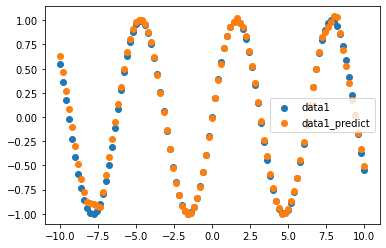

In [36]:
# 数据可视化
fig1 = plt.figure()
plt.scatter(data1_x, data1_y, label="data1")
plt.scatter(data1_x, data1_y_predict, label="data1_predict")
plt.legend()
plt.show()

In [53]:
# 模型存储
model1.save("model1.h5")

In [55]:
# 模型加载
model2 = load_model("model1.h5")

In [56]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________


In [60]:
# 迁移学习前模型预测
data2_y_predict = model2.predict(data2_x)
data2_score = r2_score(data2_y, data2_y_predict)
data2_score

-4.111072458713926

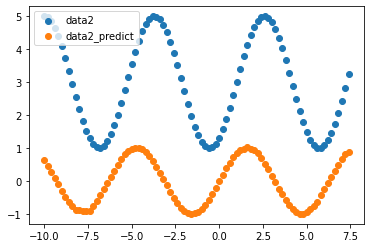

In [61]:
# 数据可视化
fig1 = plt.figure()
plt.scatter(data2_x, data2_y, label="data2")
plt.scatter(data2_x, data2_y_predict, label="data2_predict")
plt.legend()
plt.show()

In [62]:
# 模型迁移学习
model2.fit(data2_x, data2_y, epochs=20)

Epoch 1/20
3/3 [==============================] - 0s 1ms/step - loss: 7.8542
Epoch 2/20
3/3 [==============================] - 0s 1ms/step - loss: 3.0612
Epoch 3/20
3/3 [==============================] - 0s 1ms/step - loss: 3.3072
Epoch 4/20
3/3 [==============================] - 0s 1ms/step - loss: 3.0862
Epoch 5/20
3/3 [==============================] - 0s 1ms/step - loss: 2.2183
Epoch 6/20
3/3 [==============================] - 0s 2ms/step - loss: 1.9971
Epoch 7/20
3/3 [==============================] - 0s 1ms/step - loss: 1.9553
Epoch 8/20
3/3 [==============================] - 0s 2ms/step - loss: 1.7905
Epoch 9/20
3/3 [==============================] - 0s 2ms/step - loss: 1.6290
Epoch 10/20
3/3 [==============================] - 0s 2ms/step - loss: 1.4827
Epoch 11/20
3/3 [==============================] - 0s 2ms/step - loss: 1.3078
Epoch 12/20
3/3 [==============================] - 0s 2ms/step - loss: 1.2507
Epoch 13/20
3/3 [==============================] - 0s 2ms/step - loss: 1.

In [63]:
# 迁移学习后模型预测
data2_y_predict = model2.predict(data2_x)
data2_score = r2_score(data2_y, data2_y_predict)
data2_score

0.6188159646450009

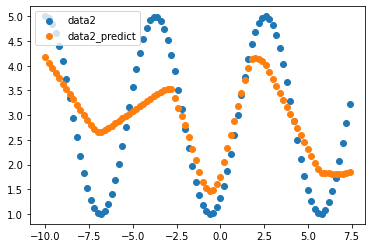

In [64]:
# 数据可视化
fig1 = plt.figure()
plt.scatter(data2_x, data2_y, label="data2")
plt.scatter(data2_x, data2_y_predict, label="data2_predict")
plt.legend()
plt.show()

In [65]:
# 模型迁移学习
model2.fit(data2_x, data2_y, epochs=80)

Epoch 1/80
3/3 [==============================] - 0s 2ms/step - loss: 0.7514
Epoch 2/80
3/3 [==============================] - 0s 2ms/step - loss: 0.7316
Epoch 3/80
3/3 [==============================] - 0s 2ms/step - loss: 0.7020
Epoch 4/80
3/3 [==============================] - 0s 1ms/step - loss: 0.6796
Epoch 5/80
3/3 [==============================] - 0s 2ms/step - loss: 0.6732
Epoch 6/80
3/3 [==============================] - 0s 1ms/step - loss: 0.6536
Epoch 7/80
3/3 [==============================] - 0s 1ms/step - loss: 0.6331
Epoch 8/80
3/3 [==============================] - 0s 1ms/step - loss: 0.6204
Epoch 9/80
3/3 [==============================] - 0s 1ms/step - loss: 0.6017
Epoch 10/80
3/3 [==============================] - 0s 1ms/step - loss: 0.5857
Epoch 11/80
3/3 [==============================] - 0s 1ms/step - loss: 0.5737
Epoch 12/80
3/3 [==============================] - 0s 1ms/step - loss: 0.5605
Epoch 13/80
3/3 [==============================] - 0s 1ms/step - loss: 0.

0.8969075836895506


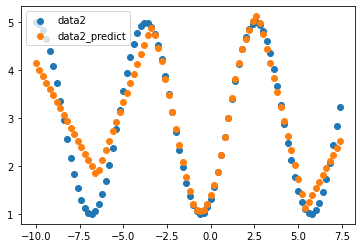

In [67]:
# 迁移学习后模型预测
data2_y_predict = model2.predict(data2_x)
data2_score = r2_score(data2_y, data2_y_predict)
print(data2_score)
# 数据可视化
fig1 = plt.figure()
plt.scatter(data2_x, data2_y, label="data2")
plt.scatter(data2_x, data2_y_predict, label="data2_predict")
plt.legend()
plt.show()